# CNNs en Google Street View


En esta seccion, trabajaremos con el dataset SVHN (Street View House Numbers), correspondiente a imagenes naturales de digitos de direcciones obtenidos desde Google Street View. El dataset contiene mas de 600.000 imagenes de entrenamiento y 26.032 im ́agenes de test. Para facilitar la realizaci ́on de experimentos, el dataset de entrenamiento se divide usualmente en un conjunto pequeno de 73.257 imagenes y un conjunto “extra” de 531.131 imagenes. En esta tarea trabajaremos solo con la version pequena. Los valientes pueden verificar que entrenando sobre el conjunto grande los resultados mejoran significativamente.

Los datos pueden ser obtenidos (en formato Matlab) ejecutando los siguientes comandos:

wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat

wget http://ufldl.stanford.edu/housenumbers/extra_32x32.mat

wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

### importante:
#### solo esta incluido el conjunto de prueba, ya que los otros dos conjuntos superan el tamaño permitido para subir al repositorio


## (a)
Cargue los datos de entrenamiento y pruebas (“train 32x32.mat” y “test 32x32.mat”). Determine el tamano de las imagenes, el numero de clases diferentes y de ejemplos en cada categorıa. Finalmente, visualice 5 imagenes de entrenamiento y 5 de test (elegidas aleatoriamente). Comente.

Dimensiones imagnes : 32 x 32
N de clases : 10
clases : [1 2 3 4 5 6 7 8 9 0]
ejemplos por clase


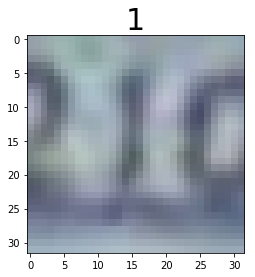

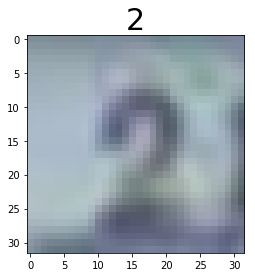

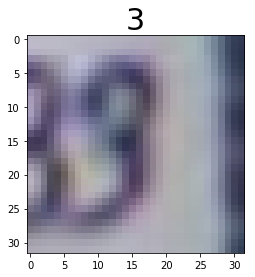

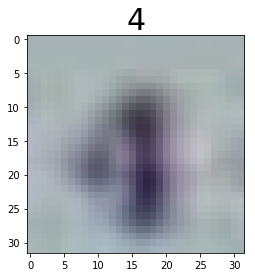

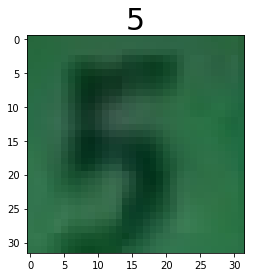

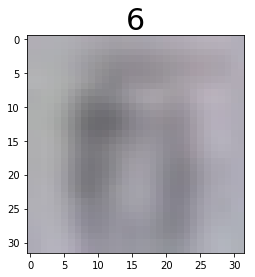

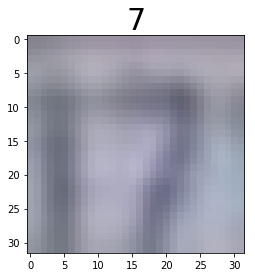

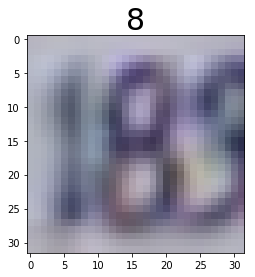

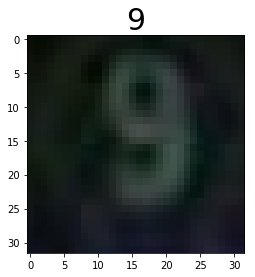

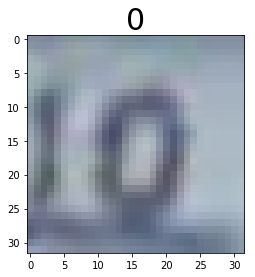

Ejemplos 5 imagenes random del conjunto de entrenamiento


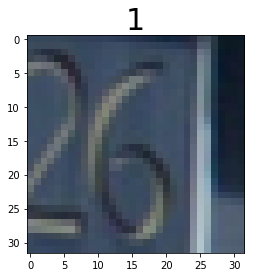

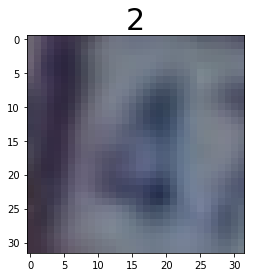

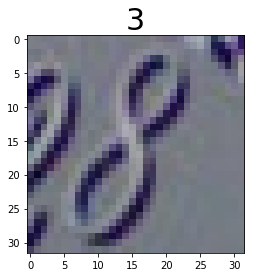

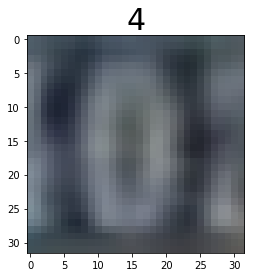

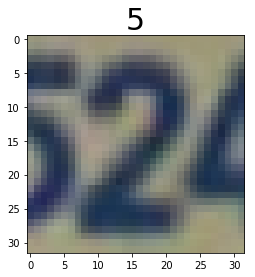

Ejemplos 5 imagenes random del conjunto de prueba


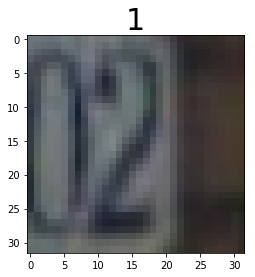

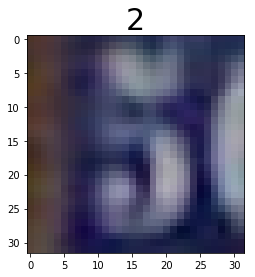

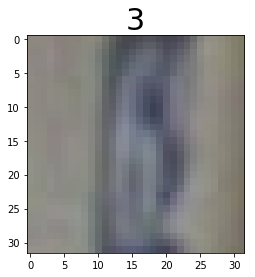

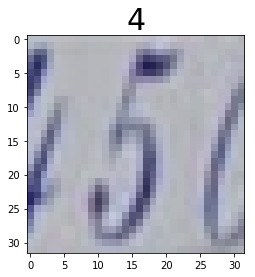

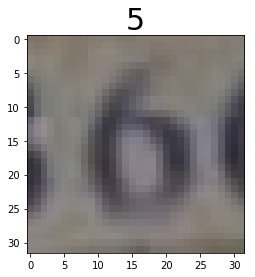

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import random


#dataset
train_data = sio.loadmat('train_32x32.mat')
test_data = sio.loadmat('test_32x32.mat')
#arreglar dataser y definir conjuntos de prueba y entrenamiento
X_train = train_data['X'].T
y_train = train_data['y'] 
X_test = test_data['X'].T
y_test = test_data['y'] 
#arreglar el orden de las dimensiones
X_train = X_train.reshape((X_train.shape[0],32,32,3))
X_test = X_test.reshape((X_test.shape[0],32,32,3))
#modificar tipo de dato a float32 para poder escalar mas adelante

#ver todas las clases distintas en conjunto de entrenamiento, son todas las clases o categorias de la salida
n_classes = len(np.unique(y_train))
#variables para indicar dimensiones de la imagen, canal(rgv) y cantidad datos en el conjunto
datos_train,tamX,tamY,channel = X_train.shape
datos_prueba,tamX,tamY,channel = X_test.shape
clases = np.unique(y_train)%10
print('Dimensiones imagnes :',tamX,'x',tamY)
print('N de clases :', n_classes)
print('clases :',clases)
print('ejemplos por clase')
#recorrer el conjunto de entrenamiento para obtener un ejemplo por clase
for i in clases :
	a = 0
	for data in y_test :
		if data%10 == i :
			# aca hay que mostrar la imagen ejemplo de la clase 
			plt.title(i, fontsize = 30)
			plt.imshow(X_test[a].reshape(3,32,32).transpose(2,1,0))
			plt.show()
			break
		a = a + 1        
print('Ejemplos 5 imagenes random del conjunto de entrenamiento')
i=0
while i<5 :
    i=i+1
    plt.title( i,fontsize = 30)
    plt.imshow(X_train[random.randrange(datos_train)].reshape(3,32,32).transpose(2,1,0))
    plt.show()
print('Ejemplos 5 imagenes random del conjunto de prueba')
i=0
while i<5 :
    i=i+1
    plt.title( i,fontsize = 30)
    plt.imshow(X_train[random.randrange(datos_prueba)].reshape(3,32,32).transpose(2,1,0))
    plt.show()

En el dataset se tienen 10 clases, una para cada digito, desde el 1 al 9, pero en particlar el numero 10 correponde al digito 0.

De los ejemplos por clase se puede ver que son medianamente claros, donde por ejemplo en la clase 1 se presenta un numero algo mas parecido al 10, que puede ser devido a que el 10 si esta contenido en el 10, luego los menos claros vendrian a ser las imagenes que presentan en las clases 3 y 8, que por su forma parecen de mayor complegidad al tener mala calidad en las imagenes.
Para los casos random, en general podrian ser distiguibles salvo casos en que al ver la imagen con el ojo humano no se distigue ningun tipo de relacion con un numero.

## (b)
Normalice las imagenes, dividiendo las intensidades originales de pixel por 255. Represente adecuadamente la salida deseada de la red de modo de tener un vector de tamaño igual al numero de clases.

In [2]:
from keras.utils import np_utils


#reduccion prueba 
X_train= X_train
y_train = y_train
X_test= X_test
y_test=y_test


Y_train = np_utils.to_categorical(y_train%10, n_classes)
Y_test = np_utils.to_categorical(y_test%10, n_classes)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Using TensorFlow backend.


## (c)
Defina una CNN con arquitectura C × P × C × P × F × F . Para la primera capa convolucional utilice 16 filtros de 5×5 y para la segunda 512 filtros de 7×7. Para la capa MLP escondida use 20 neuronas. Esta arquitectura, con algunas diferencias, fue una de las primera CNNs entrenadas sobre SVHN y consiguio una accuracy de 94.28% [11]. Genere un esquema lo mas compacto posible que muestre los cambios de forma que experimenta un patron de entrada a medida que se ejecuta un forward-pass. Entrene lared anterior un maximo de 10 epochs. ¿Logra mejorar o al menos igualar el resultado reportado en la literatura?

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import SGD, Adadelta, Adagrad

# modelo 1
modelo1 = Sequential()
modelo1.add(Convolution2D(16, 5, 5, border_mode='same', activation='relu',input_shape=X_test.shape[1:]))
modelo1.add(MaxPooling2D(pool_size=(2,2)))
modelo1.add(Convolution2D(512, 7, 7, border_mode='same', activation='relu'))
modelo1.add(MaxPooling2D(pool_size=(2, 2)))
modelo1.add(Flatten())
modelo1.add(Dense(20, activation='relu'))
modelo1.add(Dense(n_classes, activation='softmax'))
modelo1.summary()
adagrad = Adagrad(lr=0.01, epsilon=1e-08, decay=0.0)
modelo1.compile(loss='categorical_crossentropy', optimizer=adagrad, metrics=['accuracy'])

#from keras.utils.vis_utils import plot_model
#plot_model(modelo1, to_file='model.png')

from keras.callbacks import Callback

import tensorflow as tf
conf = tf.ConfigProto()
conf.gpu_options.allow_growth = True
sess = tf.Session(config=conf)

from keras import backend as k
k.set_session(sess)

results = modelo1.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))


c:\program files\python35\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), padding="same", activation="relu", input_shape=(32, 32, 3...)`
  
c:\program files\python35\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (7, 7), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 512)       401920    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 512)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                655380    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total para

c:\program files\python35\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 73257 samples, validate on 26032 samples
Epoch 1/10
73257/73257 [==============================] - 59s - loss: 2.2599 - acc: 0.2008 - val_loss: 1.9514 - val_acc: 0.3427
Epoch 2/10
73257/73257 [==============================] - 51s - loss: 1.4347 - acc: 0.5160 - val_loss: 1.1156 - val_acc: 0.6590
Epoch 3/10
73257/73257 [==============================] - 51s - loss: 0.9890 - acc: 0.6852 - val_loss: 0.8989 - val_acc: 0.7297
Epoch 4/10
73257/73257 [==============================] - 51s - loss: 0.8154 - acc: 0.7476 - val_loss: 0.8937 - val_acc: 0.7279
Epoch 5/10
73257/73257 [==============================] - 51s - loss: 0.7071 - acc: 0.7869 - val_loss: 0.7159 - val_acc: 0.7927
Epoch 6/10
73257/73257 [==============================] - 51s - loss: 0.6411 - acc: 0.8103 - val_loss: 0.7212 - val_acc: 0.7821
Epoch 7/10
73257/73257 [==============================] - 51s - loss: 0.5941 - acc: 0.8240 - val_loss: 0.7254 - val_acc: 0.7842
Epoch 8/10
73257/73257 [==============================

# Esquema de la red
![](modelo_p2.png)

Se obtuvo una Accuracy cercana al 96.86%, por lo que se logra mejorar el resultado obtenido en la literatura, se debe destacar que se utilizaron bach de tamaña 128, si duda llama la atencion que se lograron mejores resultados, pero esto pude deberse a que los bach elegidos fueron mas pequeños que los que se tenian en la referencia que eran de tamaño 1280.



## (d)
Evalue el efecto de modificar el tamano de los filtros (de convolucion y pooling) reportando la sensibilidad del error de pruebas a estos cambios. Presente un grafico o tabla resumen. Por simplicidad entre durante solo 10 epochs.

In [6]:
filtros1 = [2,3,4] #se elijen 3 menores y 2 mayores que 16 que sean escala de este
pool_size = [(2,2),(3,3),(4,4)]#[(1,1),(3,3),(4,4)] #se toman 4 opciones de pooling

for f in filtros1:
    for pool in pool_size :
        model = Sequential()
        model.add(Convolution2D(16, f, f, border_mode='same', activation='relu',input_shape=X_test.shape[1:]))
        model.add(MaxPooling2D(pool_size=pool))
        model.add(Convolution2D(512, f+2, f+2, border_mode='same', activation='relu'))
        model.add(MaxPooling2D(pool))
        model.add(Flatten())
        model.add(Dense(20, activation='relu'))
        model.add(Dense(n_classes, activation='softmax'))
        model.summary()
        adagrad = Adagrad(lr=0.01, epsilon=1e-08, decay=0.0)
        model.compile(loss='categorical_crossentropy', optimizer=adagrad, metrics=['accuracy'])
        model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

    
    
    

c:\program files\python35\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (2, 2), padding="same", activation="relu", input_shape=(32, 32, 3...)`
  import sys
c:\program files\python35\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (4, 4), activation="relu", padding="same")`
  if __name__ == '__main__':
c:\program files\python35\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 512)       131584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 512)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                655380    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
Total para

c:\program files\python35\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3...)`
  import sys
c:\program files\python35\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (5, 5), activation="relu", padding="same")`
  if __name__ == '__main__':


Train on 73257 samples, validate on 26032 samples
Epoch 1/10
73257/73257 [==============================] - 42s - loss: 4.2833 - acc: 0.2814 - val_loss: 1.6126 - val_acc: 0.4519
Epoch 2/10
73257/73257 [==============================] - 42s - loss: 1.3293 - acc: 0.5399 - val_loss: 1.1151 - val_acc: 0.6316
Epoch 3/10
73257/73257 [==============================] - 42s - loss: 0.9593 - acc: 0.6972 - val_loss: 0.9156 - val_acc: 0.7236
Epoch 4/10
73257/73257 [==============================] - 42s - loss: 0.7820 - acc: 0.7644 - val_loss: 0.8053 - val_acc: 0.7585
Epoch 5/10
73257/73257 [==============================] - 42s - loss: 0.6944 - acc: 0.7948 - val_loss: 0.7825 - val_acc: 0.7714
Epoch 6/10
73257/73257 [==============================] - 42s - loss: 0.6410 - acc: 0.8113 - val_loss: 0.6842 - val_acc: 0.8011
Epoch 7/10
73257/73257 [==============================] - 42s - loss: 0.5997 - acc: 0.8245 - val_loss: 0.6687 - val_acc: 0.8090
Epoch 8/10
73257/73257 [==============================

c:\program files\python35\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (4, 4), padding="same", activation="relu", input_shape=(32, 32, 3...)`
  import sys
c:\program files\python35\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (6, 6), activation="relu", padding="same")`
  if __name__ == '__main__':


Train on 73257 samples, validate on 26032 samples
Epoch 1/10
73257/73257 [==============================] - 49s - loss: 2.1355 - acc: 0.2503 - val_loss: 1.8185 - val_acc: 0.3571
Epoch 2/10
73257/73257 [==============================] - 48s - loss: 1.4653 - acc: 0.5209 - val_loss: 1.1395 - val_acc: 0.6487
Epoch 3/10
73257/73257 [==============================] - 48s - loss: 1.0134 - acc: 0.6818 - val_loss: 0.9746 - val_acc: 0.6896
Epoch 4/10
73257/73257 [==============================] - 48s - loss: 0.8393 - acc: 0.7456 - val_loss: 0.8032 - val_acc: 0.7596
Epoch 5/10
73257/73257 [==============================] - 48s - loss: 0.7352 - acc: 0.7810 - val_loss: 0.7341 - val_acc: 0.7812
Epoch 6/10
73257/73257 [==============================] - 48s - loss: 0.6679 - acc: 0.8030 - val_loss: 0.6846 - val_acc: 0.8038
Epoch 7/10
73257/73257 [==============================] - 48s - loss: 0.6237 - acc: 0.8172 - val_loss: 0.6513 - val_acc: 0.8159
Epoch 8/10
73257/73257 [==============================

para este caso se decido hacer 15 casos, y antes de correr tener en mente  los valores de los parametros de peso a fijar.

####  casos (modificacion del numero de filtros conv. y pooling)
|caso | filtro convolucional 1  | pooling 1 | filtro convolucional 2 | pooling 2 | parametros |
|---------|---------|---------|--------|---------|------|
|1 | 4 | 1 | 128 | 1 | 2,647,190 |
|2 | 4 | 3 | 128 | 3 | 48,790 |
|3 | 4 | 4 | 128 | 4 | 35,990 |
|4 | 8 | 1 | 256 | 1 |  5,344,326 |
|5 | 8| 3 | 256| 3 |  147,526 |
|6 | 8| 4 | 256| 4 |  121,926 |
|7 | 12| 1 | 384| 1 | 8,091,638  |
|8 |12 | 3 | 384| 3 |  296,438 |
|9 |12 | 4 | 384|4 |  258,038 |
|10 | 20| 1 | 640| 1 |  13,736,790 |
|11 | 20| 3 |640 | 3 |  744,790 |
|12 | 20| 4 | 640| 4 |  680,790 |
|13 | 24| 1 | 768| 1 |  16,634,630 |
|14 | 24| 3 | 768 | 3 |  1,044,230|
|15 | 24| 4 | 768 | 4 | 967,430 |
|||||||
|0|16|2|512|2|1,058,726|

Luego de este primer acercamiento, podemos ver que el no usar un capa pooling, o dejarla como (1,1) que es practicamente los mismo, complejiza muchismo el problema en cuanto a cantidad de parametros, luego de este analisis se descarto esta opcion sin probarla, por lo que de los 15 casos quedaron 12.
(Esta seccion se dejo por que es una buena forma de ver la repercucion de las capas pooling, pero no correspondia a la pregunta )


#### casos
|caso | filtro convolucional 1  | pooling 1 | filtro convolucional 2 | pooling 2 | parametros | accuracy |
|---------|---------|---------|--------|---------|------|-----|
|1 | 2,2 | 2,2 | 4,4 | 2,2 |787,382| 0.8229 |
|2 | 2,2 | 3,3 | 4,4 | 3,3 |224,182| 0.6616 |
|3 | 2,2 | 4,4 | 4,4 | 4,4 |172,982| 0.5440|
|4 | 3,3 | 2,2 | 5,5 | 2,2 |861,350|  0.8269 |
|5 | 3,3| 3,3 | 5,5| 3,3 |298,150|  0.7001 |
|6 | 3,3| 4,4 | 5,5| 4,4 |246,950| 0.6114  |
|7 |4,4| 2,2 | 6,6| 2,2, |951,798|  0.8326 |
|8 |4,4 | 3,3 | 6,6| 3,3 |388,598|  0.1958 |
|9 |4,4 | 4,4 | 6,6|4,4 |337,398| 0.7648  |
||||||||
|0|5,5|2,2|7,7|2,2|1,058,726|0.82.79|



Podemos apreciar que el mejor caso fue el 7 que es muy parecido al modelo propuesto en la pregunta c, con las mismas capas pooling, pero con kernel convolucionales un poco mas pequenos, esto podria ocurrir porque con estos kernel se ajusta mejor a las caracteristicas de la imagen, tambien al tener un menor numero de parametros, menor en un 10% aproximadamente, podria haber tenido un mejor entrenamiento.

## (e)
Evalue el efecto de modificar el numero de filtros para las capas convolucionales tanto en los tiempos de entrenamiento como en el desempeno de la red. Presente un grafico o tabla resumen. Por simplicidad entre durante solo 10 epochs.


In [8]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adagrad
filtros1 = [4,8,12,20,24] #se elijen 3 menores y 2 mayores que 16 que sean escala de este
factor = 512/16 # se escala el segundo filtro en funcion del primero
for f in filtros1 :
    model = Sequential()
    model.add(Convolution2D(f, 5, 5, border_mode='same', activation='relu',input_shape=X_test.shape[1:]))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Convolution2D(int(factor*f), 7, 7, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(20, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    model.summary()
    adagrad = Adagrad(lr=0.01, epsilon=1e-08, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=adagrad, metrics=['accuracy'])
    item_e_results=model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

    

c:\program files\python35\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(4, (5, 5), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  
c:\program files\python35\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (7, 7), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 4)         304       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 4)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 128)       25216     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 20)                163860    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                210       
Total para

c:\program files\python35\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 73257 samples, validate on 26032 samples
Epoch 1/10
73257/73257 [==============================] - 13s - loss: 1.8596 - acc: 0.3425 - val_loss: 1.3361 - val_acc: 0.5445
Epoch 2/10
73257/73257 [==============================] - 13s - loss: 1.1469 - acc: 0.6254 - val_loss: 0.9809 - val_acc: 0.6958
Epoch 3/10
73257/73257 [==============================] - 13s - loss: 0.9215 - acc: 0.7150 - val_loss: 0.9273 - val_acc: 0.7149
Epoch 4/10
73257/73257 [==============================] - 13s - loss: 0.8152 - acc: 0.7529 - val_loss: 0.8153 - val_acc: 0.7614
Epoch 5/10
73257/73257 [==============================] - 13s - loss: 0.7462 - acc: 0.7764 - val_loss: 0.7546 - val_acc: 0.7848
Epoch 6/10
73257/73257 [==============================] - 13s - loss: 0.7012 - acc: 0.7926 - val_loss: 0.7291 - val_acc: 0.7911
Epoch 7/10
73257/73257 [==============================] - 13s - loss: 0.6666 - acc: 0.8038 - val_loss: 0.7233 - val_acc: 0.7906
Epoch 8/10
73257/73257 [==============================

c:\program files\python35\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (5, 5), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  
c:\program files\python35\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (7, 7), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.


Train on 73257 samples, validate on 26032 samples
Epoch 1/10
73257/73257 [==============================] - 25s - loss: 13.0500 - acc: 0.1890 - val_loss: 12.9608 - val_acc: 0.1959
Epoch 2/10
73257/73257 [==============================] - 24s - loss: 13.0684 - acc: 0.1892 - val_loss: 12.9609 - val_acc: 0.1959
Epoch 3/10
73257/73257 [==============================] - 24s - loss: 13.0684 - acc: 0.1892 - val_loss: 12.9609 - val_acc: 0.1959
Epoch 4/10
73257/73257 [==============================] - 24s - loss: 13.0684 - acc: 0.1892 - val_loss: 12.9609 - val_acc: 0.1959
Epoch 5/10
73257/73257 [==============================] - 24s - loss: 13.0684 - acc: 0.1892 - val_loss: 12.9609 - val_acc: 0.1959
Epoch 6/10
73257/73257 [==============================] - 24s - loss: 13.0684 - acc: 0.1892 - val_loss: 12.9610 - val_acc: 0.1959
Epoch 7/10
73257/73257 [==============================] - 24s - loss: 13.0684 - acc: 0.1892 - val_loss: 12.9610 - val_acc: 0.1959
Epoch 8/10
73257/73257 [================

c:\program files\python35\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (5, 5), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  
c:\program files\python35\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(384, (7, 7), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.


Train on 73257 samples, validate on 26032 samples
Epoch 1/10
73257/73257 [==============================] - 39s - loss: 2.0806 - acc: 0.2526 - val_loss: 1.7835 - val_acc: 0.3453
Epoch 2/10
73257/73257 [==============================] - 38s - loss: 1.5906 - acc: 0.4565 - val_loss: 1.4192 - val_acc: 0.5333
Epoch 3/10
73257/73257 [==============================] - 37s - loss: 1.3060 - acc: 0.5759 - val_loss: 1.2598 - val_acc: 0.5981
Epoch 4/10
73257/73257 [==============================] - 38s - loss: 1.1817 - acc: 0.6087 - val_loss: 1.1377 - val_acc: 0.6303
Epoch 5/10
73257/73257 [==============================] - 38s - loss: 1.0931 - acc: 0.6337 - val_loss: 1.0846 - val_acc: 0.6416
Epoch 6/10
73257/73257 [==============================] - 38s - loss: 1.0258 - acc: 0.6550 - val_loss: 1.0056 - val_acc: 0.6935
Epoch 7/10
73257/73257 [==============================] - 38s - loss: 0.9744 - acc: 0.6833 - val_loss: 0.9819 - val_acc: 0.7043
Epoch 8/10
73257/73257 [==============================

c:\program files\python35\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (5, 5), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  
c:\program files\python35\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(640, (7, 7), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.


Train on 73257 samples, validate on 26032 samples
Epoch 1/10
73257/73257 [==============================] - 67s - loss: 2.0093 - acc: 0.3009 - val_loss: 1.5380 - val_acc: 0.5025
Epoch 2/10
73257/73257 [==============================] - 66s - loss: 1.1666 - acc: 0.6252 - val_loss: 0.9001 - val_acc: 0.7256
Epoch 3/10
73257/73257 [==============================] - 66s - loss: 0.8078 - acc: 0.7563 - val_loss: 0.7508 - val_acc: 0.7810
Epoch 4/10
73257/73257 [==============================] - 66s - loss: 0.6809 - acc: 0.7983 - val_loss: 0.6689 - val_acc: 0.8067
Epoch 5/10
73257/73257 [==============================] - 66s - loss: 0.6141 - acc: 0.8202 - val_loss: 0.6243 - val_acc: 0.8231
Epoch 6/10
73257/73257 [==============================] - 66s - loss: 0.5693 - acc: 0.8324 - val_loss: 0.6358 - val_acc: 0.8176
Epoch 7/10
73257/73257 [==============================] - 66s - loss: 0.5340 - acc: 0.8429 - val_loss: 0.5864 - val_acc: 0.8297
Epoch 8/10
73257/73257 [==============================

c:\program files\python35\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  
c:\program files\python35\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(768, (7, 7), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.


Train on 73257 samples, validate on 26032 samples
Epoch 1/10
73257/73257 [==============================] - 81s - loss: 13.7703 - acc: 0.1443 - val_loss: 13.5492 - val_acc: 0.1594
Epoch 2/10
73257/73257 [==============================] - 80s - loss: 13.7892 - acc: 0.1445 - val_loss: 13.5492 - val_acc: 0.1594
Epoch 3/10
73257/73257 [==============================] - 79s - loss: 13.7892 - acc: 0.1445 - val_loss: 13.5492 - val_acc: 0.1594
Epoch 4/10
73257/73257 [==============================] - 80s - loss: 13.7892 - acc: 0.1445 - val_loss: 13.5492 - val_acc: 0.1594
Epoch 5/10
73257/73257 [==============================] - 80s - loss: 13.7892 - acc: 0.1445 - val_loss: 13.5492 - val_acc: 0.1594
Epoch 6/10
73257/73257 [==============================] - 80s - loss: 13.7892 - acc: 0.1445 - val_loss: 13.5492 - val_acc: 0.1594
Epoch 7/10
73257/73257 [==============================] - 80s - loss: 13.7892 - acc: 0.1445 - val_loss: 13.5492 - val_acc: 0.1594
Epoch 8/10
73257/73257 [================

### Tiempos


|caso | N filtro convolucional 1  | N filtro convolucional 2 | parametros | Acuraccy | 
|--|---|------|---|----|
|1 | 4 |  128 | 189,590 |0.8063  |
|2 | 8 |  256 | 429,126 | 0.1959 |
|3 | 12 | 384 | 718,838 | 0.7091 |
|4 | 20 | 640 | 1,448,790 | 0.8362 |
|5 | 24 | 768 | 1,889,030 | 0.1594 |
|  |    |     |  |  |
| 0| 16 | 512 | 1,058,726  | 0.8279 |

el mejor resultado obtenido fue en el caso 4, cabe destacar que ocurre algo inesperado en los casos 2 y 5, donde los resultados son muy bajos, cercanos a la seleccion de un numero aleatorio del 1 al 10, 

## (f)
Proponga una mejora sobre la red definida en (c) que mejore el error de pruebas. Recuerde que debe definir un subconjunto de validacion si necesita elegir entre arquitecturas.

### propuesta
 Agregar dos capas convolucionales dejando una arquitectura
 #### C x C x P x C x C x P x F x F
 con esto tambien aumentan los parametros y se espera probara con los mismos conjuntos de entrenamiento y de prueba.
 

In [11]:
model = Sequential()
model.add(Convolution2D(20, 5, 5, border_mode='same', activation='relu',input_shape=(32,32,3)))
model.add(Convolution2D(16, 5, 5, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(640, 7, 7, border_mode='same', activation='relu'))
model.add(Convolution2D(256, 7, 7, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
model.summary()
adagrad = Adagrad(lr=0.001, epsilon=1e-08, decay=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=adagrad, metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))


c:\program files\python35\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  
c:\program files\python35\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\program files\python35\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (7, 7), activation="relu", padding="same")`
  """
c:\program files\python35\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (7, 7), activation="relu", padding="same")`
  
c:\program files\python35\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  w

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 16)        1216      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 16)        6416      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 16, 256)       200960    
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 256)       3211520   
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 16384)             0         
__________

KeyboardInterrupt: 

Se tomo el mejor caso, que tenia una accuracy de 0.83, obtenido en la parte g, donde se modificaron los numero de filtros convolucionales en ambas capas, dejando 20 filtros en la primera capa y 640 en la segunda capa convolucional.
Con esto se esperaria una mejora de  3

## (g)
Elija una de las redes entrenadas (preferentemente una con buen desempeno) y visualice los pesos correspondientes a los filtros de la primera capa convolucional. Visualice ademas el efecto del filtro sobre algunas imagenes de entrenamiento. Comente.

In [12]:
peso_capa1 = modelo1.layers[0].get_weights()
peso_capa1

[array([[[[ -5.17976843e-02,   1.19125590e-01,  -1.74913071e-02, ...,
            -2.86182947e-02,  -5.97018786e-02,   1.86184034e-01],
          [ -1.21255806e-02,   1.16413534e-01,  -4.74413224e-02, ...,
            -5.27962409e-02,  -4.74852547e-02,  -6.02045469e-03],
          [ -2.51901615e-02,  -8.27911124e-02,   8.43644142e-03, ...,
             1.20735243e-02,   5.12264669e-02,   7.03486949e-02]],
 
         [[ -2.17245724e-02,   1.36119515e-01,  -5.32966852e-02, ...,
             9.88411456e-02,  -3.08607891e-02,   5.61505444e-02],
          [ -7.45859817e-02,   4.73911054e-02,   7.01108873e-02, ...,
             3.48385870e-02,   1.61132384e-02,  -8.24138671e-02],
          [  7.18120486e-02,   6.17230136e-04,  -1.37014076e-01, ...,
             6.06522374e-02,   7.72086531e-02,  -1.30343169e-01]],
 
         [[  3.36786732e-02,   1.16599172e-01,  -1.02436803e-01, ...,
             8.82786587e-02,   5.05502596e-02,  -5.37707470e-03],
          [  3.45963649e-02,  -1.21213971e

In [15]:
np.array(peso_capa1[0]).shape

(5, 5, 3, 16)

In [17]:
# vizualizacion de capas imagenes de 5x5
imagenes = np.array(peso_capa1)
imagenes = imagnes.reshape(16,5,5,3)
for imagen in imagenes :
    plt.imshow(imagen)
    plt.show()

2

## (h)
Elija una de las redes entrenadas en esta seccion y determine los pares de dıgitos (por ejemplo “1” con “7”) que la red tiende a confundir. Conjeture el motivo de tal confusion.

## (i)
(Opcional, Bonus +10 en certamen) Evalue la conveniencia de utilizar todo el dataset (“extra 32x32.mat”) en el entrenamiento de la red.